### Laboratorium 5 - zadania - transformacja Hougha

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Zadanie 1

Zbadaj wpływ parametrów transformacji Hougha na jakość detekcji prostych na przykładzie obrazu `norway`. Wykorzystaj ulubiony detektor krawędzi i zaprezentuj jego wynik przed użyciem transformacji Hougha. Zapoznaj się z dokumentacją funkcji [`cv2.HoughLines`](https://docs.opencv.org/4.5.3/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a), zwłaszcza parametrami sterującymi rozdzielczością `rho`, `theta` oraz progiem (`threshold`). Błędnie dobrany próg może szczególnie negatywnie wpłynąć na wyniki.

Zacznij od znalezienia odpowiednich parametrów detektora krawędzi - jeśli na tym etapie wyniki będą słabe, to dalej będzie tylko gorzej (_garbage-in, garbage-out_) - ale nie skupiaj się na badaniu ich wpływu na wyniki.

Zadanie _nie_ polega na zrobieniu grid searcha parametrów transformacji Hougha, tylko na zrozumieniu zachowania parametrów `rho` i `theta`, oraz wpływu progu.

Ostateczny rezultat zaprezentuj w postaci odcinków naniesionych na kopię obrazu wejściowego (patrz komórka `[3]`).

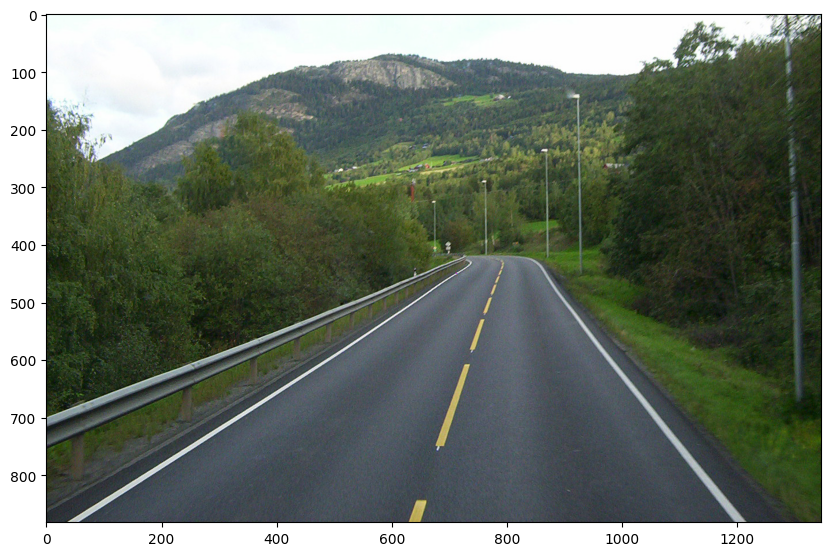

In [2]:
norway = cv2.imread('Lab5_dane/norway.jpg')[..., ::-1]
plt.subplots(1, 1, figsize=(10,10))[1].imshow(norway);

In [3]:
def rhotheta2xy(line):
    # konwersja parametrów prostej w układzie rho-theta do odcinka w układzie kartezjańskim
    # wynik można użyć jako argumenty funkcji cv2.line
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 5000*(-b))
    y1 = int(y0 + 5000*(a))
    x2 = int(x0 - 5000*(-b))
    y2 = int(y0 - 5000*(a))
    return x1, y1, x2, y2

Rozwiązanie:

In [4]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
%matplotlib widget

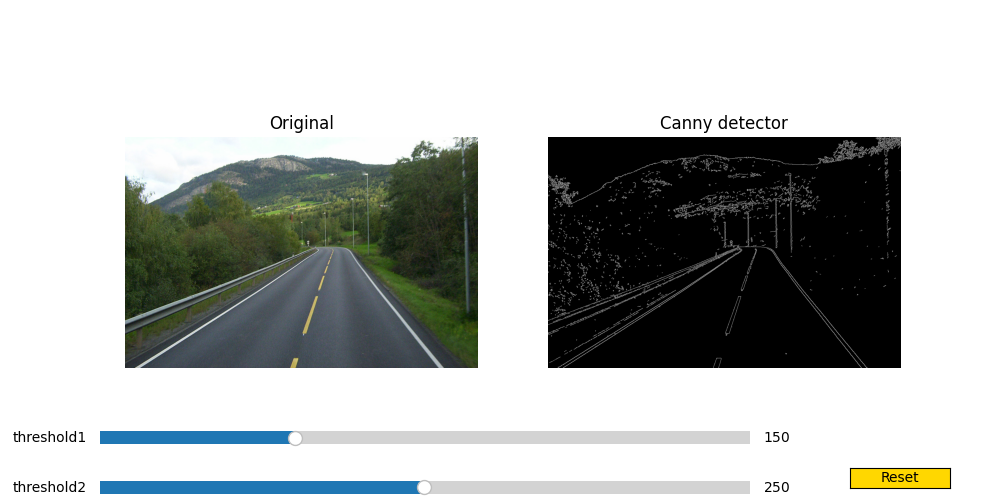

In [5]:
def anim_canny(image):

    fig, axs = plt.subplots(1, 2, figsize = (10, 5))
    axs[0].imshow(image)
    axs[0].axis('off')
    axs[0].set_title('Original')
    axs[1].imshow(cv2.Canny(image, 150, 250, None, 3), cmap = 'gray')
    axs[1].axis('off')
    axs[1].set_title('Canny detector')

    min_thresh_slider_ax = plt.axes([0.1, 0.1, 0.65, 0.05], facecolor = 'lightgoldenrodyellow')
    min_thresh_slider = Slider(min_thresh_slider_ax, 'threshold1', 0, 501, valinit = 150, valstep = 10)

    max_thresh_slider_ax = plt.axes([0.1, 0, 0.65, 0.05], facecolor = 'lightgoldenrodyellow')
    max_thresh_slider = Slider(max_thresh_slider_ax, 'threshold2', 0, 501, valinit = 250, valstep = 10)
    
    resetax = plt.axes([0.85, 0.025, 0.1, 0.04])
    button = Button(resetax, 'Reset', color = 'gold', hovercolor = 'skyblue')

    def update(val):
        min_thresh = int(min_thresh_slider.val)
        max_thresh = int(max_thresh_slider.val)
        canny_image = cv2.Canny(image, min_thresh, max_thresh, None, 3)
        
        axs[1].clear()
        axs[1].imshow(canny_image, cmap = 'gray')
        axs[1].axis('off')
        axs[1].set_title('Canny detector')
        fig.canvas.draw_idle()
    
    def resetSlider(event):
        min_thresh_slider.reset()
        max_thresh_slider.reset()

    min_thresh_slider.on_changed(update)
    max_thresh_slider.on_changed(update)
    button.on_clicked(resetSlider)

    plt.show()
    
    
    
anim_canny(norway)

In [6]:
def detect_lines(image, rho = 1, theta = np.pi / 180, threshold = 150):
    
    image_with_lines = image.copy() # tutaj będziemy rysować wykryte proste
    detected_edges = cv2.Canny(image, 150, 250, None, 3) # detektor krawędzi Cannyego
    # szukanie parametrów prostych
    lines = cv2.HoughLines(image = detected_edges, 
                           rho = rho, 
                           theta = theta, 
                           threshold = threshold, 
                           lines = None, 
                           srn = 0, 
                           stn = 0)
    # rysowanie prostych
    if lines is not None: 
        for line in lines:
            x1, y1, x2, y2 = rhotheta2xy(line)
            pt1 = x1, y1
            pt2 = x2, y2
            cv2.line(image_with_lines, pt1, pt2, (255, 0, 0), 1, cv2.LINE_AA)

    return image_with_lines



def anim_hough(image):

    fig, axs = plt.subplots(1, 2, figsize = (10, 5))
    axs[0].imshow(image)
    axs[0].axis('off')
    axs[0].set_title('Original')
    axs[1].imshow(detect_lines(image))
    axs[1].axis('off')
    axs[1].set_title('Detected lines')

    rho_slider_ax = plt.axes([0.1, 0.16, 0.65, 0.05], facecolor = 'lightgoldenrodyellow')
    rho_slider = Slider(rho_slider_ax, 'rho', 0.1, 10.1, valinit = 1, valstep = 0.1)

    theta_slider_ax = plt.axes([0.1, 0.08, 0.65, 0.05], facecolor = 'lightgoldenrodyellow')
    theta_slider = Slider(theta_slider_ax, 'theta', 0.01, np.pi, valinit = np.pi / 180, valstep = np.pi / 180)
    
    thresh_slider_ax = plt.axes([0.1, 0, 0.65, 0.05], facecolor = 'lightgoldenrodyellow')
    thresh_slider = Slider(thresh_slider_ax, 'threshold', 0, 500, valinit = 150, valstep = 1)
    
    resetax = plt.axes([0.85, 0.025, 0.1, 0.04])
    button = Button(resetax, 'Reset', color = 'gold', hovercolor = 'skyblue')

    def update(val):
        rho = float(rho_slider.val)
        theta = float(theta_slider.val)
        thresh = int(thresh_slider.val)
        norway_with_lines = detect_lines(image = image, rho = rho, theta = theta, threshold = thresh)
        
        axs[1].clear()
        axs[1].imshow(norway_with_lines)
        axs[1].axis('off')
        axs[1].set_title('Detected lines')
        fig.canvas.draw_idle()
    
    def resetSlider(event):
        rho_slider.reset()
        theta_slider.reset()
        thresh_slider.reset()

    rho_slider.on_changed(update)
    theta_slider.on_changed(update)
    thresh_slider.on_changed(update)
    button.on_clicked(resetSlider)

    plt.show()

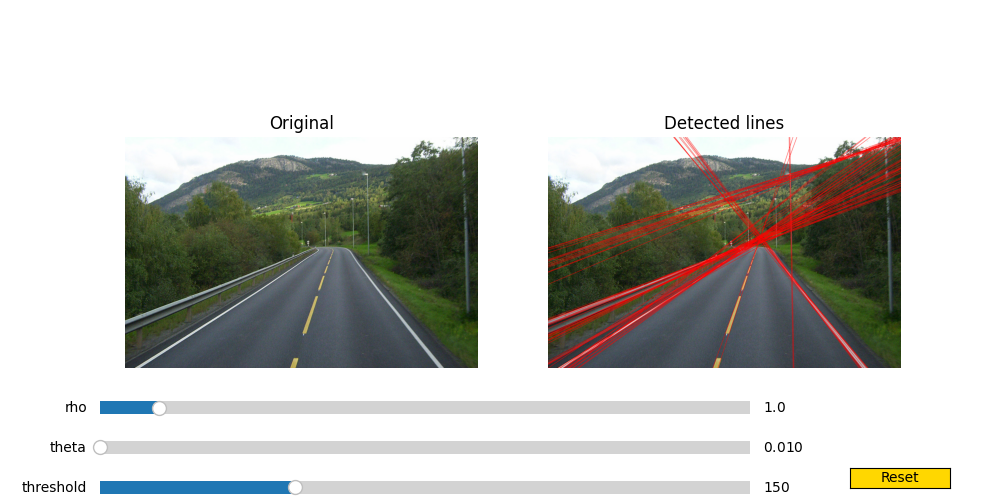

In [7]:
anim_hough(norway)

In [8]:
%matplotlib inline

#### Zadanie 2

Dany jest obraz `pillbox`. Wykorzystaj transformację Hougha dla prostych, aby wykryć krawędzie między komórkami organizera.

Dla odmiany, w tym zadaniu nie jest istotne badanie parametrów ale wyłącznie końcowy wynik.

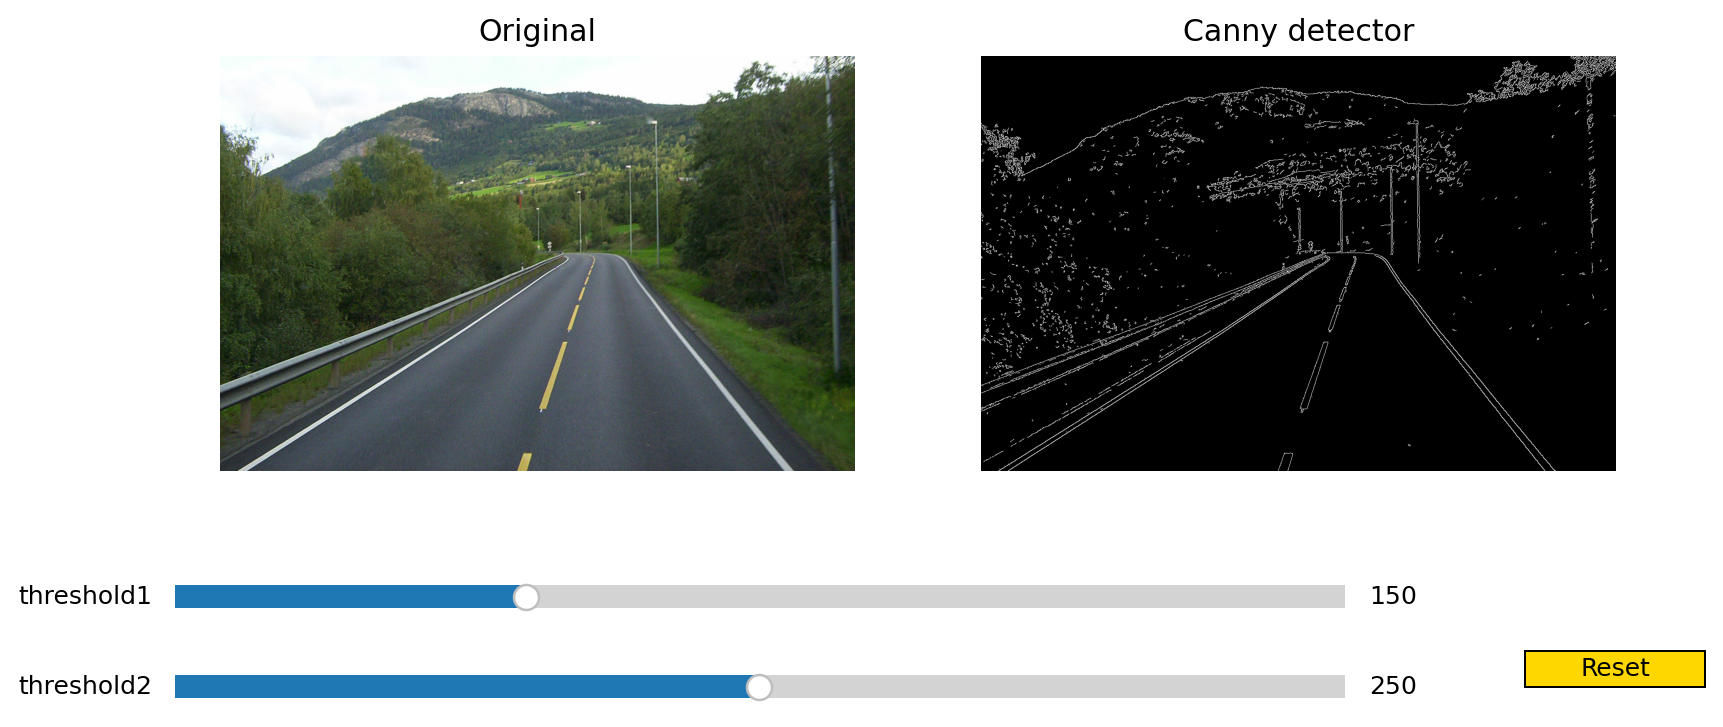

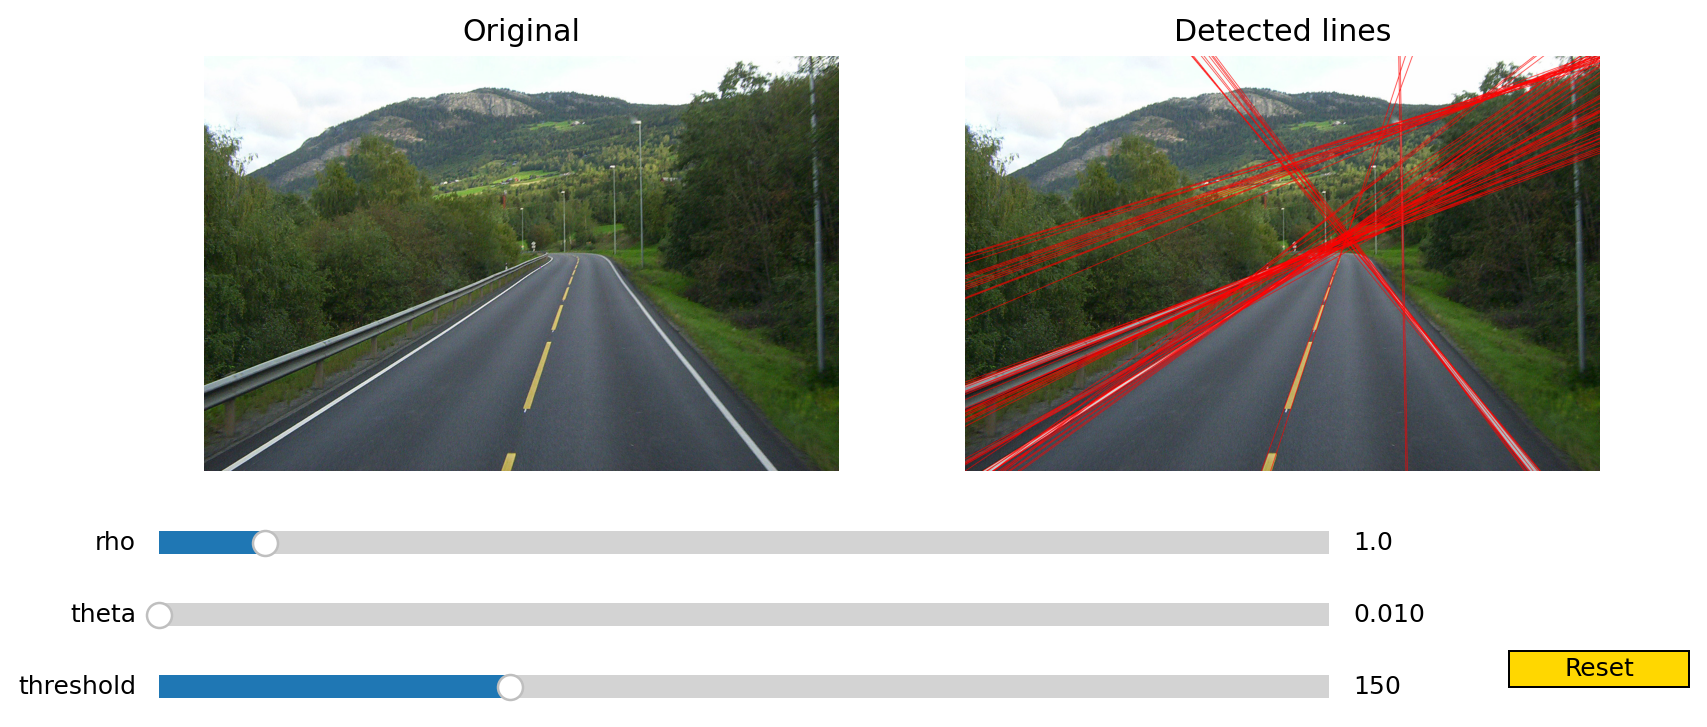

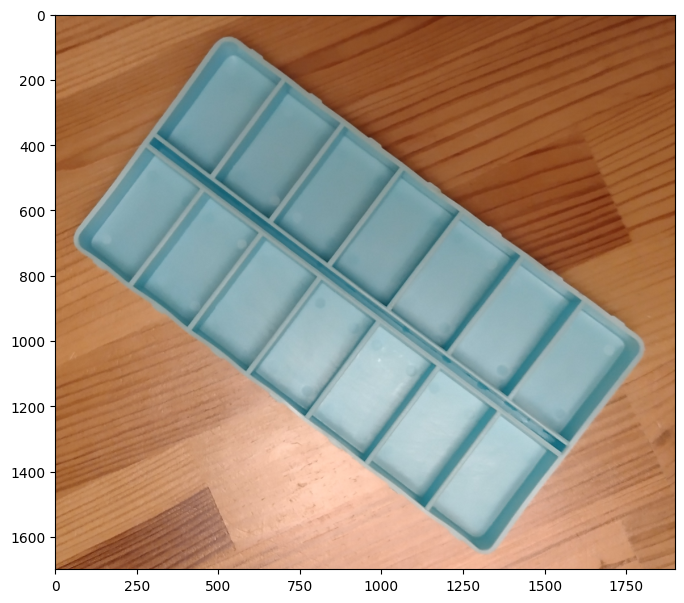

No such comm: 8099cf641f2c4db4b274c3c7809e23d8


In [9]:
pillbox = cv2.imread('Lab5_dane/pillbox.png')[..., ::-1]
plt.subplots(1, 1, figsize=(8,8))[1].imshow(pillbox);

Rozwiązanie:

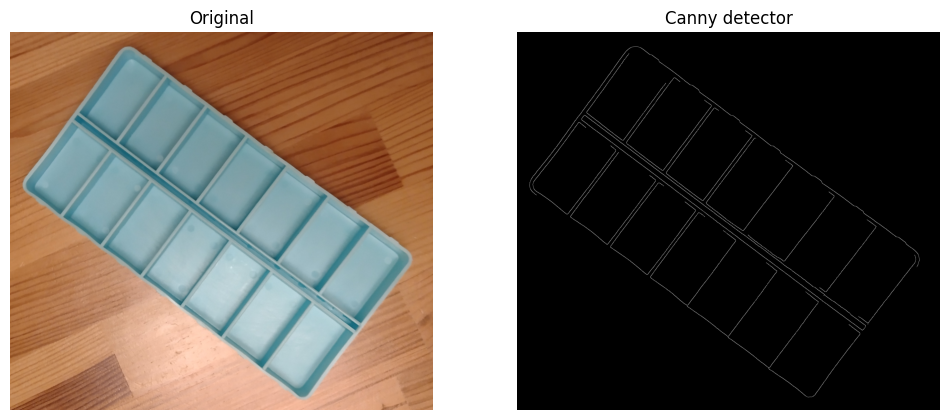

In [10]:
blurred = cv2.GaussianBlur(pillbox, (7, 7), 0)
canny_pillbox = cv2.Canny(blurred, threshold1 = 50, threshold2 = 200, edges = None, apertureSize = 3)


fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(pillbox)
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(canny_pillbox, cmap = 'gray')
axs[1].set_title('Canny detector')
axs[1].axis('off')

plt.show()

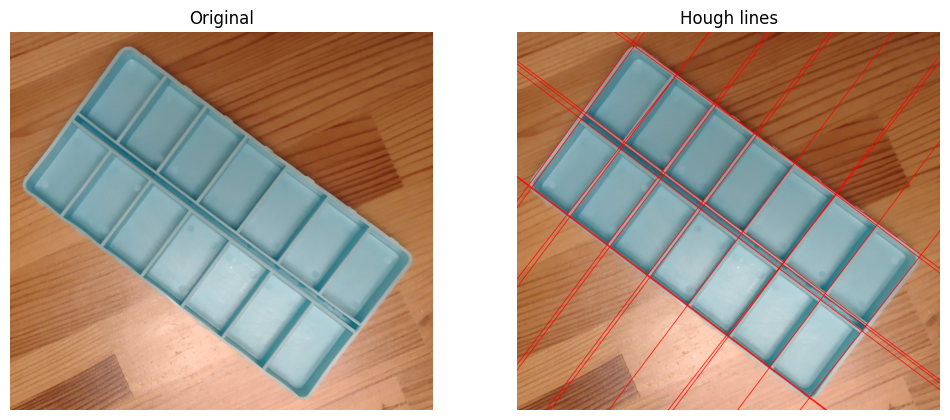

In [11]:
lines = cv2.HoughLines(image = canny_pillbox, 
                        rho = 1, 
                        theta = np.pi / 180, 
                        threshold = 230, 
                        lines = None, 
                        srn = 0, 
                        stn = 0)

hough_pillbox = pillbox.copy()
if lines is not None: 
    for line in lines:
        x1, y1, x2, y2 = rhotheta2xy(line)
        pt1 = x1, y1
        pt2 = x2, y2
        cv2.line(hough_pillbox, pt1, pt2, (255, 0, 0), 2, cv2.LINE_AA)



fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(pillbox)
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(hough_pillbox, cmap = 'gray')
axs[1].set_title('Hough lines')
axs[1].axis('off')

plt.show()